In [590]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os


In [591]:
dataset = pd.read_csv("processed.cleveland.data", header=None)
dataset.columns = [
    "age",
    "sex",
    "cp",
    "restbp",
    "chol",
    "fbs",
    "restecg",
    "thalach",
    "exang",
    "oldpeak",
    "slope",
    "ca",
    "thal",
    "hdlevel",
]

dataset.head()


,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hdlevel
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [592]:
dataset.dtypes


age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hdlevel      int64
dtype: object

In [593]:
dataset["ca"].unique()


array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [594]:
dataset["thal"].unique()


array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [595]:
dataset_clean = dataset.loc[(dataset["ca"] != "?") & (dataset["thal"] != "?")]
len(dataset_clean)


297

In [596]:
for col in dataset_clean.columns:
    print(col, dataset_clean[col].unique())


age [63. 67. 37. 41. 56. 62. 57. 53. 44. 52. 48. 54. 49. 64. 58. 60. 50. 66.
 43. 40. 69. 59. 42. 55. 61. 65. 71. 51. 46. 45. 39. 68. 47. 34. 35. 29.
 70. 77. 38. 74. 76.]
sex [1. 0.]
cp [1. 4. 3. 2.]
restbp [145. 160. 120. 130. 140. 172. 150. 110. 132. 117. 135. 112. 105. 124.
 125. 142. 128. 170. 155. 104. 180. 138. 108. 134. 122. 115. 118. 100.
 200.  94. 165. 102. 152. 101. 126. 174. 148. 178. 158. 192. 129. 144.
 123. 136. 146. 106. 156. 154. 114. 164.]
chol [233. 286. 229. 250. 204. 236. 268. 354. 254. 203. 192. 294. 256. 263.
 199. 168. 239. 275. 266. 211. 283. 284. 224. 206. 219. 340. 226. 247.
 167. 230. 335. 234. 177. 276. 353. 243. 225. 302. 212. 330. 175. 417.
 197. 198. 290. 253. 172. 273. 213. 305. 216. 304. 188. 282. 185. 232.
 326. 231. 269. 267. 248. 360. 258. 308. 245. 270. 208. 264. 321. 274.
 325. 235. 257. 164. 141. 252. 255. 201. 222. 260. 182. 303. 265. 309.
 307. 249. 186. 341. 183. 407. 217. 288. 220. 209. 227. 261. 174. 281.
 221. 205. 240. 289. 318. 298. 564.

In [597]:
dataset_clean = pd.get_dummies(
    dataset_clean, columns=["cp", "restecg", "slope", "thal"], drop_first=True
)
dataset_clean.head()


,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,hdlevel,cp_2.0,cp_3.0,cp_4.0,restecg_1.0,restecg_2.0,slope_2.0,slope_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,0,0,0,0,0,1,0,1,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,2,0,0,1,0,1,1,0,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,1,0,0,1,0,1,1,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,0,1,0,0,0,0,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,1,0,0,0,1,0,0,0,0


In [598]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree


In [599]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset_clean.drop("hdlevel", 1),
    dataset_clean["hdlevel"],
    train_size=0.7,
    random_state=0,
)


C:\Users\ishaa\AppData\Local\Temp\ipykernel_904\2419726299.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  dataset_clean.drop("hdlevel", 1),


In [600]:
feature_names = X_train.columns
y_train_str = y_train.astype("str")
y_train_str = y_train_str.values


In [601]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [602]:
model = RandomForestClassifier(n_estimators=100000)
model.fit(X_train, y_train.values.ravel())


RandomForestClassifier(n_estimators=100000)

[Text(0.4075168918918919, 0.9444444444444444, 'cp_4.0 <= 0.034\ngini = 0.637\nsamples = 127\nvalue = [115, 28, 28, 25, 11]\nclass = 3'),
 Text(0.14020270270270271, 0.8333333333333334, 'chol <= 0.187\ngini = 0.313\nsamples = 70\nvalue = [91, 12, 5, 3, 0]\nclass = 3'),
 Text(0.06756756756756757, 0.7222222222222222, 'restbp <= 1.022\ngini = 0.137\nsamples = 43\nvalue = [64, 2, 3, 0, 0]\nclass = 3'),
 Text(0.02702702702702703, 0.6111111111111112, 'oldpeak <= 1.07\ngini = 0.033\nsamples = 37\nvalue = [58, 0, 1, 0, 0]\nclass = 3'),
 Text(0.013513513513513514, 0.5, 'gini = 0.0\nsamples = 35\nvalue = [56, 0, 0, 0, 0]\nclass = 3'),
 Text(0.04054054054054054, 0.5, 'oldpeak <= 1.847\ngini = 0.444\nsamples = 2\nvalue = [2, 0, 1, 0, 0]\nclass = 3'),
 Text(0.02702702702702703, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0]\nclass = 1'),
 Text(0.05405405405405406, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [2, 0, 0, 0, 0]\nclass = 3'),
 Text(0.10810810810810811, 0.61

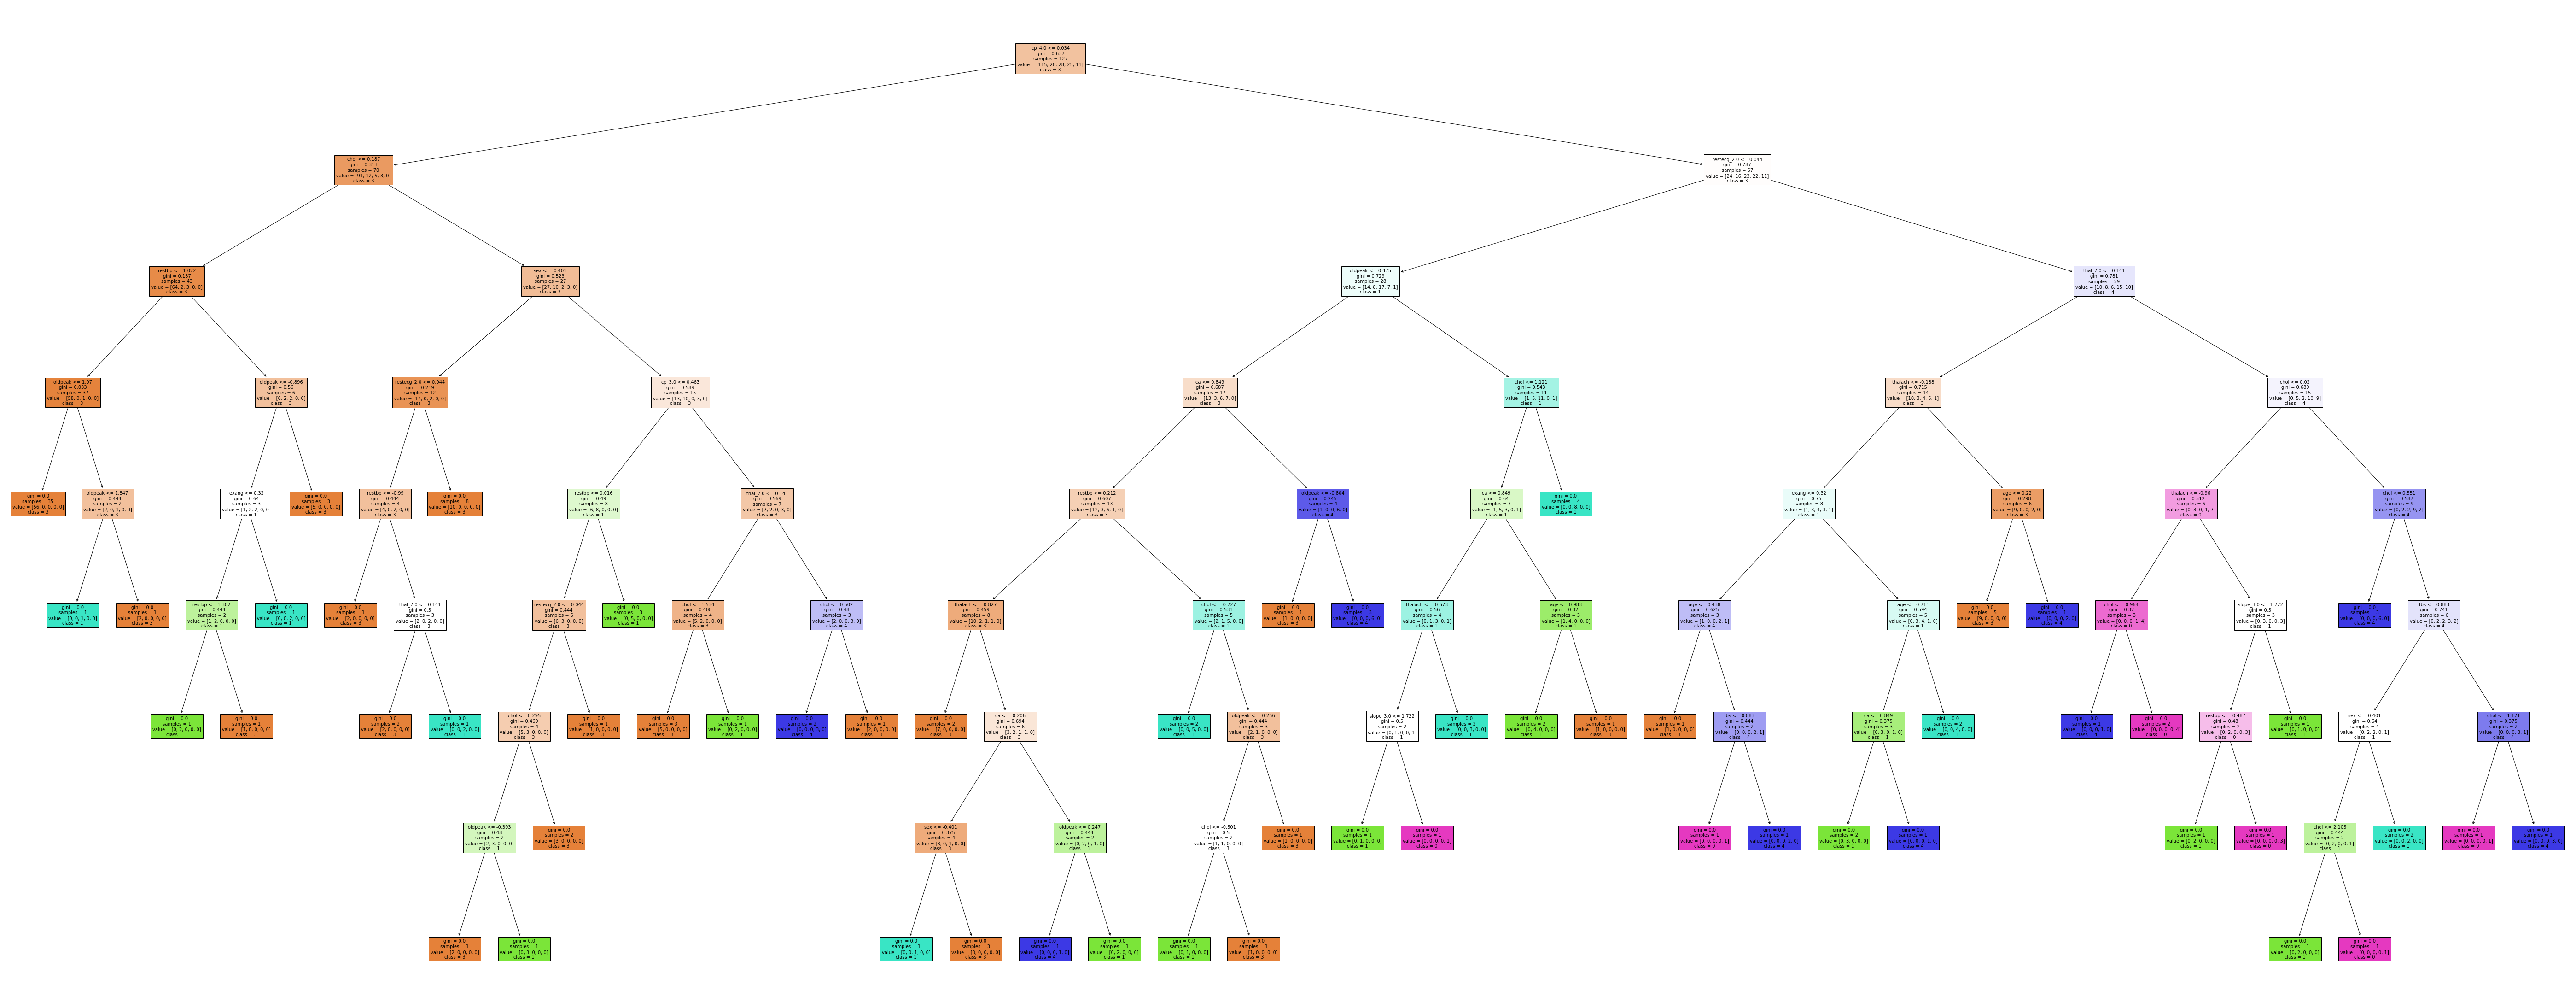

In [603]:
plt.figure(figsize=(100, 40))
plot_tree(model.estimators_[0], feature_names=feature_names, class_names=y_train_str, filled=True)


C:\Users\ishaa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


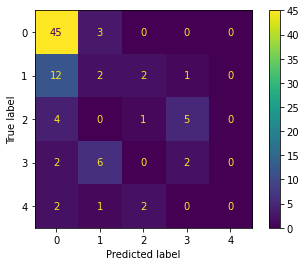

In [604]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

plot_confusion_matrix(model, X_test, y_test)
plt.show()

In [605]:
def evaluate(y_test, y_pred):
  # cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
  acc = accuracy_score(y_true=y_test, y_pred=y_pred) * 100
  fs = f1_score(y_true=y_test, y_pred=y_pred, average='micro')
  rs = recall_score(y_true=y_test, y_pred=y_pred, average='micro')
  ps = precision_score(y_true=y_test, y_pred=y_pred, average='micro')

  print('Accuracy score:', acc)
  # print('F1 score:', fs)
  # print('Recall score:', rs)
  # print('Precision score:', ps)

In [606]:
y_pred = model.predict(X_test)

evaluate(y_test, y_pred)



Accuracy score: 55.55555555555556
